In [1]:
# ### uncommnet these if this is the first time you use these packages ####
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install seaborn
# !pip install pyod
# !pip install PiML

  Using cached pandas-2.2.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.1.0-cp310-cp310-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp310-cp310-macosx_10_9_x86_64.whl (12.6 MB)
Using cached numpy-2.1.0-cp310-cp310-macosx_10_9_x86_64.whl (21.1 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 23.0 MB/s eta 0:00:0000:0100:01
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp310-cp310-macosx_10_9_universa

In [5]:
# mute warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

# Data set
**We're going to use the Motor Trends Cars ("mtcars") data set that is built into the R programming language.**
```
mpg - Miles per Gallon
cyl - # of cylinders
disp - displacement, in cubic inches
hp - horsepower
drat - driveshaft ratio
wt - weight
qsec - 1/4 mile time; a measure of acceleration
vs - 'V' or straight - engine shape
am - transmission; auto or manual
gear - # of gears
carb - # of carburetors.
```

In [36]:
# Load the dataset
df = pd.read_csv("mtcars.csv")

# Here we are going to use the "model" of the car as a the index to our dataframe
df.set_index('model', inplace=True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [37]:
# Descriptive statistics
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [38]:
# Check whether there are any missing values
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [39]:
# Heatmap based on standardized values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
# scaled_df.abs().sum(axis=1)
df.style.background_gradient(cmap ='coolwarm', gmap=scaled_df, axis=None, vmin=-3, vmax=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.000000,6,160.000000,110,3.900000,2.620000,16.460000,0,1,4,4
Mazda RX4 Wag,21.000000,6,160.000000,110,3.900000,2.875000,17.020000,0,1,4,4
Datsun 710,22.800000,4,108.000000,93,3.850000,2.320000,18.610000,1,1,4,1
Hornet 4 Drive,21.400000,6,258.000000,110,3.080000,3.215000,19.440000,1,0,3,1
Hornet Sportabout,18.700000,8,360.000000,175,3.150000,3.440000,17.020000,0,0,3,2
Valiant,18.100000,6,225.000000,105,2.760000,3.460000,20.220000,1,0,3,1
Duster 360,14.300000,8,360.000000,245,3.210000,3.570000,15.840000,0,0,3,4
Merc 240D,24.400000,4,146.700000,62,3.690000,3.190000,20.000000,1,0,4,2
Merc 230,22.800000,4,140.800000,95,3.920000,3.150000,22.900000,1,0,4,2


# Use regression models to predict fuel comsumption(mpg)

In [40]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### split the dataset into training and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], df.iloc[:,0], test_size=0.1, random_state=42)

## Linear Regression

In [42]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print(X_train.columns)
print(regr.coef_)
#Predict using the test set
pred = regr.predict(X_test)

#Calculate the metrics for regression
reg_r2 = r2_score(y_test, pred)
reg_mse = mean_squared_error(y_test, pred)
print('------------')
print(reg_r2, reg_mse)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[-0.40110818  0.01316612 -0.02167558  0.59836675 -3.83000087  0.70898298
  0.07163707  1.57941842  0.659154    0.0778369 ]
------------
0.8383955580471785 9.935744099588128


## SVM for regression

In [43]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [44]:
# Create svm regression object
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))

# Train the model using the training sets
regr_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [45]:
#Predict using the test set
pred = regr_svm.predict(X_test)

#Calculate the metrics for regression
svm_r2 = r2_score(y_test, pred)
svm_mse = mean_squared_error(y_test, pred)

In [46]:
print(svm_r2, svm_mse)

0.784034144131135 13.27798575479757


## Gradient Boosting for regression

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
# Create gradient boosting regression object
reg_gb = GradientBoostingRegressor(random_state=0)

# Train the model using the training sets
reg_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [55]:
#Predict using the test set
pred = reg_gb.predict(X_test)

#Calculate the metrics for regression
gb_r2 = r2_score(y_test, pred)
gb_mse = mean_squared_error(y_test, pred)

In [56]:
#Make a table to compare the performance of different models
pd.DataFrame({'LinearRegression':[reg_r2,reg_mse], 'SVM':[svm_r2, svm_mse],  'GradientBoosting':[gb_r2, gb_mse]}, index=['R2', 'MSE'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
MSE,9.935744,13.277986,7.590488


## Outlier Detection: univariate case

<Axes: >

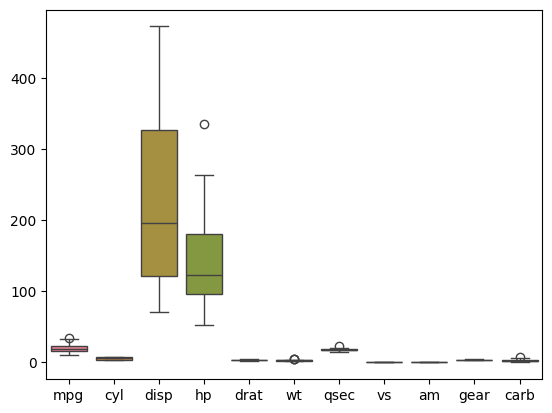

In [52]:
#use sns.boxplot to find univariate outliers
sns.boxplot(data=df)

In [53]:
# Find the outliers for "wt"
wtQ1 = df['wt'].quantile(0.25)
wtQ3 = df['wt'].quantile(0.75)
wtIQR = wtQ3 - wtQ1    #IQR is interquartile range.
print(wtQ1, wtQ3, wtIQR)

wt_upper_limit = (wtQ3 + 1.5 * wtIQR)
wt_lower_limit = (wtQ1 - 1.5 * wtIQR)
# Show the boxplot outliers
df.loc[(df['wt'] < wt_lower_limit) | (df['wt'] > wt_upper_limit)]

2.58125 3.61 1.02875


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [62]:
# Find the outliers for "hp" and "qsec"
# hp
hpQ1 = df['hp'].quantile(0.25)
hpQ3 = df['hp'].quantile(0.75)
hpIQR = hpQ3 - hpQ1    #IQR is interquartile range.
print(hpQ1, hpQ3, hpIQR)

hp_upper_limit = (hpQ3 + 1.5 * hpIQR)
hp_lower_limit = (hpQ1 - 1.5 * hpIQR)
# Show the boxplot outliers
df.loc[(df['hp'] < hp_lower_limit) | (df['hp'] > hp_upper_limit)]

96.5 180.0 83.5


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [61]:
#qsec
qsecQ1 = df['qsec'].quantile(0.25)
qsecQ3 = df['qsec'].quantile(0.75)
qsecIQR = qsecQ3 - qsecQ1    #IQR is interquartile range.
print(qsecQ1, qsecQ3, qsecIQR)

qsec_upper_limit = (qsecQ3 + 1.5 * qsecIQR)
qsec_lower_limit = (qsecQ1 - 1.5 * qsecIQR)
# Show the boxplot outliers
df.loc[(df['qsec'] < qsec_lower_limit) | (df['qsec'] > qsec_upper_limit)]

16.8925 18.9 2.0075000000000003


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


## Outlier Treatments

### Capping Outliers (using IQR)

In [63]:
df2 = X_train.copy()

In [64]:
# This code will "cap" (or floor) the outliers to our limit for the wt predictor
df2['wt'] = np.where(df2['wt'] > wt_upper_limit,
  wt_upper_limit,
  np.where(
    df2['wt'] < wt_lower_limit,
    wt_lower_limit,
    df2['wt']
   )
)

In [65]:
# Write code to cap/floor the hp and qsec predictors
# hp
df2['hp'] = np.where(df2['hp'] > hp_upper_limit,
  hp_upper_limit,
  np.where(
    df2['hp'] < hp_lower_limit,
    hp_lower_limit,
    df2['hp']
   )
)

In [66]:
#qsec
df2['qsec'] = np.where(df2['qsec'] > qsec_upper_limit,
  qsec_upper_limit,
  np.where(
    df2['qsec'] < qsec_lower_limit,
    qsec_lower_limit,
    df2['qsec']
   )
)

In [67]:
# Use describe to ensure our min/max looks right
df2.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,6.142857,224.978571,144.044643,3.618214,3.158009,17.868973,0.464286,0.392857,3.678571,2.750000
std,1.799471,116.042580,67.338698,0.544066,0.900980,1.733991,0.507875,0.497347,0.722832,1.554563
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,120.825000,96.500000,3.132500,2.581250,16.892500,0.000000,0.000000,3.000000,2.000000
50%,6.000000,196.300000,118.000000,3.715000,3.325000,17.790000,0.000000,0.000000,4.000000,2.000000
75%,8.000000,307.500000,180.000000,3.920000,3.570000,18.900000,1.000000,1.000000,4.000000,4.000000
max,8.000000,472.000000,305.250000,4.930000,5.153125,21.911250,1.000000,1.000000,5.000000,8.000000


In [68]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df2, y_train)
pred = regr.predict(X_test)
reg_r2_capped = r2_score(y_test, pred)
reg_mse_capped = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df2, y_train)
pred = regr_svm.predict(X_test)
svm_r2_capped = r2_score(y_test, pred)
svm_mse_capped = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df2, y_train)
pred = reg_gb.predict(X_test)
gb_r2_capped = r2_score(y_test, pred)
gb_mse_capped = mean_squared_error(y_test, pred)

In [69]:
# compare metrics: no treatment VS "capped"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped],
        'SVM':[svm_r2, svm_r2_capped],
        'GradientBoosting':[gb_r2, gb_r2_capped]},
    index=['R2', 'R2_capped'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187


In [70]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped],
     'SVM':[svm_mse, svm_mse_capped],
     'GradientBoosting':[gb_mse, gb_mse_capped]},
    index=['MSE', 'MSE_capped'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320


### Removing rows with outliers

In [71]:
df3 = X_train.copy()

In [72]:
# This code will remove outliers beyond our limit for the wt predictor
y_train.drop(y_train[(df3.wt < wt_lower_limit) | (df3.wt > wt_upper_limit)].index, inplace=True)
df3.drop(df3[df3.wt < wt_lower_limit].index, inplace=True)
df3.drop(df3[df3.wt > wt_upper_limit].index, inplace=True)

In [73]:
# Write code to remove outliers beyond our limit for the hp and qsec predictors
#hp
y_train.drop(y_train[(df3.hp < hp_lower_limit) | (df3.hp > hp_upper_limit)].index, inplace=True)
df3.drop(df3[df3.hp < hp_lower_limit].index, inplace=True)
df3.drop(df3[df3.hp > hp_upper_limit].index, inplace=True)

In [74]:
# Use describe to ensure our min/max looks right
df3.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000
mean,5.920000,203.45600,131.720000,3.664400,2.981920,18.052800,0.520000,0.4,3.680000,2.440000
std,1.777639,99.78418,58.289164,0.551831,0.736313,1.807483,0.509902,0.5,0.690411,1.157584
min,4.000000,71.10000,52.000000,2.760000,1.513000,14.500000,0.000000,0.0,3.000000,1.000000
25%,4.000000,120.30000,95.000000,3.150000,2.465000,16.900000,0.000000,0.0,3.000000,2.000000
50%,6.000000,167.60000,110.000000,3.770000,3.190000,18.000000,1.000000,0.0,4.000000,2.000000
75%,8.000000,275.80000,175.000000,3.920000,3.460000,18.900000,1.000000,1.0,4.000000,4.000000
max,8.000000,360.00000,264.000000,4.930000,4.070000,22.900000,1.000000,1.0,5.000000,4.000000


In [75]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df3, y_train)
pred = regr.predict(X_test)
reg_r2_removed = r2_score(y_test, pred)
reg_mse_removed = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df3, y_train)
pred = regr_svm.predict(X_test)
svm_r2_removed = r2_score(y_test, pred)
svm_mse_removed = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df3, y_train)
pred = reg_gb.predict(X_test)
gb_r2_removed = r2_score(y_test, pred)
gb_mse_removed = mean_squared_error(y_test, pred)

In [76]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed]},
    index=['R2', 'R2_capped', 'R2_removed'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.653304,0.768442,0.710787


In [77]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed]},
    index=['MSE', 'MSE_capped', 'MSE_removed'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,21.315513,14.236615,17.781374


## Outlier Detection: multivariate case

In [78]:
# If not already installed, install pyod
!pip install pyod

In [81]:
# use LOF (with 5 nearest neighbors) to detection multivariate outliers
# and eliminate rows with and lof score > 1.3
from pyod.models.lof import LOF

df4 = df.copy()

# Prepare the LOF model with 5 nearest neighbors
lof = LOF(n_neighbors=5)

# Fit the LOF model and predict the outliers
lof.fit(df4)
lof_scores = lof.decision_scores_

# Add the LOF scores to the dataframe
df4['LOF_Value'] = lof_scores

# Eliminate rows with LOF score > 1.3
df4 = df4[df4['LOF_Value'] <= 1.3].drop(columns=['LOF_Value'])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [90]:
# Rebuild the models
X_train_lof, X_tes_lof, y_train_lof, y_test_lof = train_test_split(
    df4.iloc[:,1:], df4.iloc[:,0], test_size=0.1, random_state=42)

########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(X_train_lof, y_train_lof)
pred = regr.predict(X_test)
print(X_train.columns)
print(regr.coef_)
reg_r2_removed_lof = r2_score(y_test, pred)
reg_mse_removed_lof = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(X_train_lof, y_train_lof)
pred = regr_svm.predict(X_test)
svm_r2_removed_lof = r2_score(y_test, pred)
svm_mse_removed_lof = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(X_train_lof, y_train_lof)
pred = reg_gb.predict(X_test)
gb_r2_removed_lof = r2_score(y_test, pred)
gb_mse_removed_lof = mean_squared_error(y_test, pred)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[ 1.02562276  0.01654778 -0.01100132  2.15009254 -3.74708476  0.99293147
  1.24035756  2.05720933  2.90071033 -0.99782087]


In [83]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed,reg_r2_removed_lof],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed, svm_r2_removed_lof],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed, gb_r2_removed_lof]},
    index=['R2', 'R2_capped', 'R2_removed', 'R2_removed_lof'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.876541
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.653304,0.768442,0.710787
R2_removed_lof,0.891588,0.860716,0.884177


In [84]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed,reg_mse_removed_lof],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed, svm_mse_removed_lof],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed, gb_mse_removed_lof]},
    index=['MSE', 'MSE_capped', 'MSE_removed', 'MSE_removed_lof'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.590488
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,21.315513,14.236615,17.781374
MSE_removed_lof,6.665388,8.563416,7.121020


# Q1. What were the top 4 most influential features in the `regr` model above?


Original Regr:
- am: 1.57941842 
- qsec: 0.70898298
- gear: 0.659154
- drat: 0.59836675

Latest Regr with Outliers Removed:
- gear: 2.90071033
- drat: 2.15009254
- am: 2.05720933
- vs: 1.24035756

# Q2. What was the most influential features in the `regr` model above?  What was the most influential feature in the `reg_gb` model above?


# Q3. In the original data set (`df`) which car looks more like a *bivariate outlier* with respect to `disp` and `drat`?  *Masarati Bora*, *Ford Pantera L*, or the *Toyota Corolla*?

- Masarati Bora seems to most likely as it has a high disp and a low drat. Ford Pantera has a high disp and drat while the Toyota Corolla has a lower disp and drat than both of them.

# Q4. Could the `scipy.stats.mstats.winsorize` function in Python be used to easily treat *only* the outliers we found with `sns.boxplot`?  Explain.


# Q5. How does the "capping" the outliers affect model performance?  What happens if you change the `random_state` to 43 in the train/test split (and then re-build the models)?  What could be done to provide more robust error metrics?


# Q6. *On average (given many different train/test splits)*, what modeling method is most affected by the removal of outliers in this data set?  Why?


# Q7. What car has the 4th highest LOF value?  What attributes of this car showed up as univariate outliers according to our boxplots (IQR * 1.5 method)?


# Q8. In LOF method, there is a hyperparameter, what is it?  And what does it represent?

- The hyperparamater was the n_neighbors,and it defines how many points (neighbors) around each data point should be included in this comparison when calculating the LOF.

# Q9. Which outlier treatment worked best on this data set? [given the random_state=42 when splitting the data]

# Q10. Which model is most likely to exhibit benign over-fitting?  If we theoretically put these models into production and tested them on new (previously unseen) cars, how might we detect that over-fitting?  Is it possible that what we previously treated as "outliers" would appear more "normal" in our data over time?